In [1]:
!git clone https://github.com/tensorflow/tpu/

Cloning into 'tpu'...
remote: Enumerating objects: 10159, done.
remote: Counting objects: 100% (361/361), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 10159 (delta 201), reused 279 (delta 159), pack-reused 9798
Receiving objects: 100% (10159/10159), 24.44 MiB | 28.09 MiB/s, done.
Resolving deltas: 100% (7239/7239), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from IPython import display
from PIL import Image
import numpy as np
%tensorflow_version 1.x
import tensorflow as tf
import sys
sys.path.insert(0, 'tpu/models/official')
sys.path.insert(0, 'tpu/models/official/mask_rcnn')
import coco_metric
from mask_rcnn.object_detection import visualization_utils
import cv2
from google.colab.patches import cv2_imshow
from keras.preprocessing import image

ID_MAPPING = {
    1: 'orang',
    2: 'sepeda pancal',
    3: 'mobil',
    4: 'sepeda motor',
    5: 'pesawat terbang',
    6: 'bus',
    7: 'kereta',
    8: 'truk',
    9: 'perahu',
    10: 'bangjo',
    11: 'pemadam',
    13: 'rambu berhenti',
    14: 'meteran parkir',
    15: 'bangku',
    16: 'burung',
    17: 'kucing',
    18: 'anjing',
    19: 'kuda',
    20: 'domba',
    21: 'sapi',
    22: 'gajah',
    23: 'beruang',
    24: 'zebra',
    25: 'jerapah',
    27: 'ransel',
    28: 'payung',
    31: 'tas tangan',
    32: 'dasi',
    33: 'koper',
    34: 'frisbee',
    35: 'ski',
    36: 'papan luncur salju',
    37: 'bola',
    38: 'layang-layang',
    39: 'tongkat baseball',
    40: 'sarung tangan baseball',
    41: 'skateboard',
    42: 'papan selancar',
    43: 'raket tenis',
    44: 'botol',
    46: 'gelas anggur',
    47: 'cangkir',
    48: 'garpu',
    49: 'pisau',
    50: 'sendok',
    51: 'mangkuk',
    52: 'pisang',
    53: 'apel',
    54: 'sandwich',
    55: 'jeruk',
    56: 'brokoli',
    57: 'wortel',
    58: 'hot dog',
    59: 'pizza',
    60: 'donat',
    61: 'kue',
    62: 'kursi',
    63: 'sofa',
    64: 'tanaman pot',
    65: 'tempat tidur',
    67: 'meja makan',
    70: 'toilet',
    72: 'tv',
    73: 'laptop',
    74: 'mouse',
    75: 'remot',
    76: 'keyboard',
    77: 'hp',
    78: 'microwave',
    79: 'oven',
    80: 'pemanggang roti',
    81: 'bak cuci',
    82: 'kulkas',
    84: 'buku',
    85: 'jam',
    86: 'vas bunga',
    87: 'gunting',
    88: 'boneka beruang',
    89: 'pengering rambut',
    90: 'sikat gigi',
}
category_index = {k: {'id': k, 'name': ID_MAPPING[k]} for k in ID_MAPPING}

session = tf.Session(graph=tf.Graph())

saved_model_dir = 'gs://cloud-tpu-checkpoints/mask-rcnn/1555659850'
_ = tf.saved_model.loader.load(session, ['serve'], saved_model_dir)

TensorFlow 1.x selected.


Using TensorFlow backend.


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from gs://cloud-tpu-checkpoints/mask-rcnn/1555659850/variables/variables


In [6]:
#CNN
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.metrics import categorical_accuracy

size_ = 128

model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape = (size_, size_, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(units = 10000, activation = 'relu'))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.load_weights('/content/drive/MyDrive/Banana Lassi/kkk_7.h5')



AttributeError: ignored

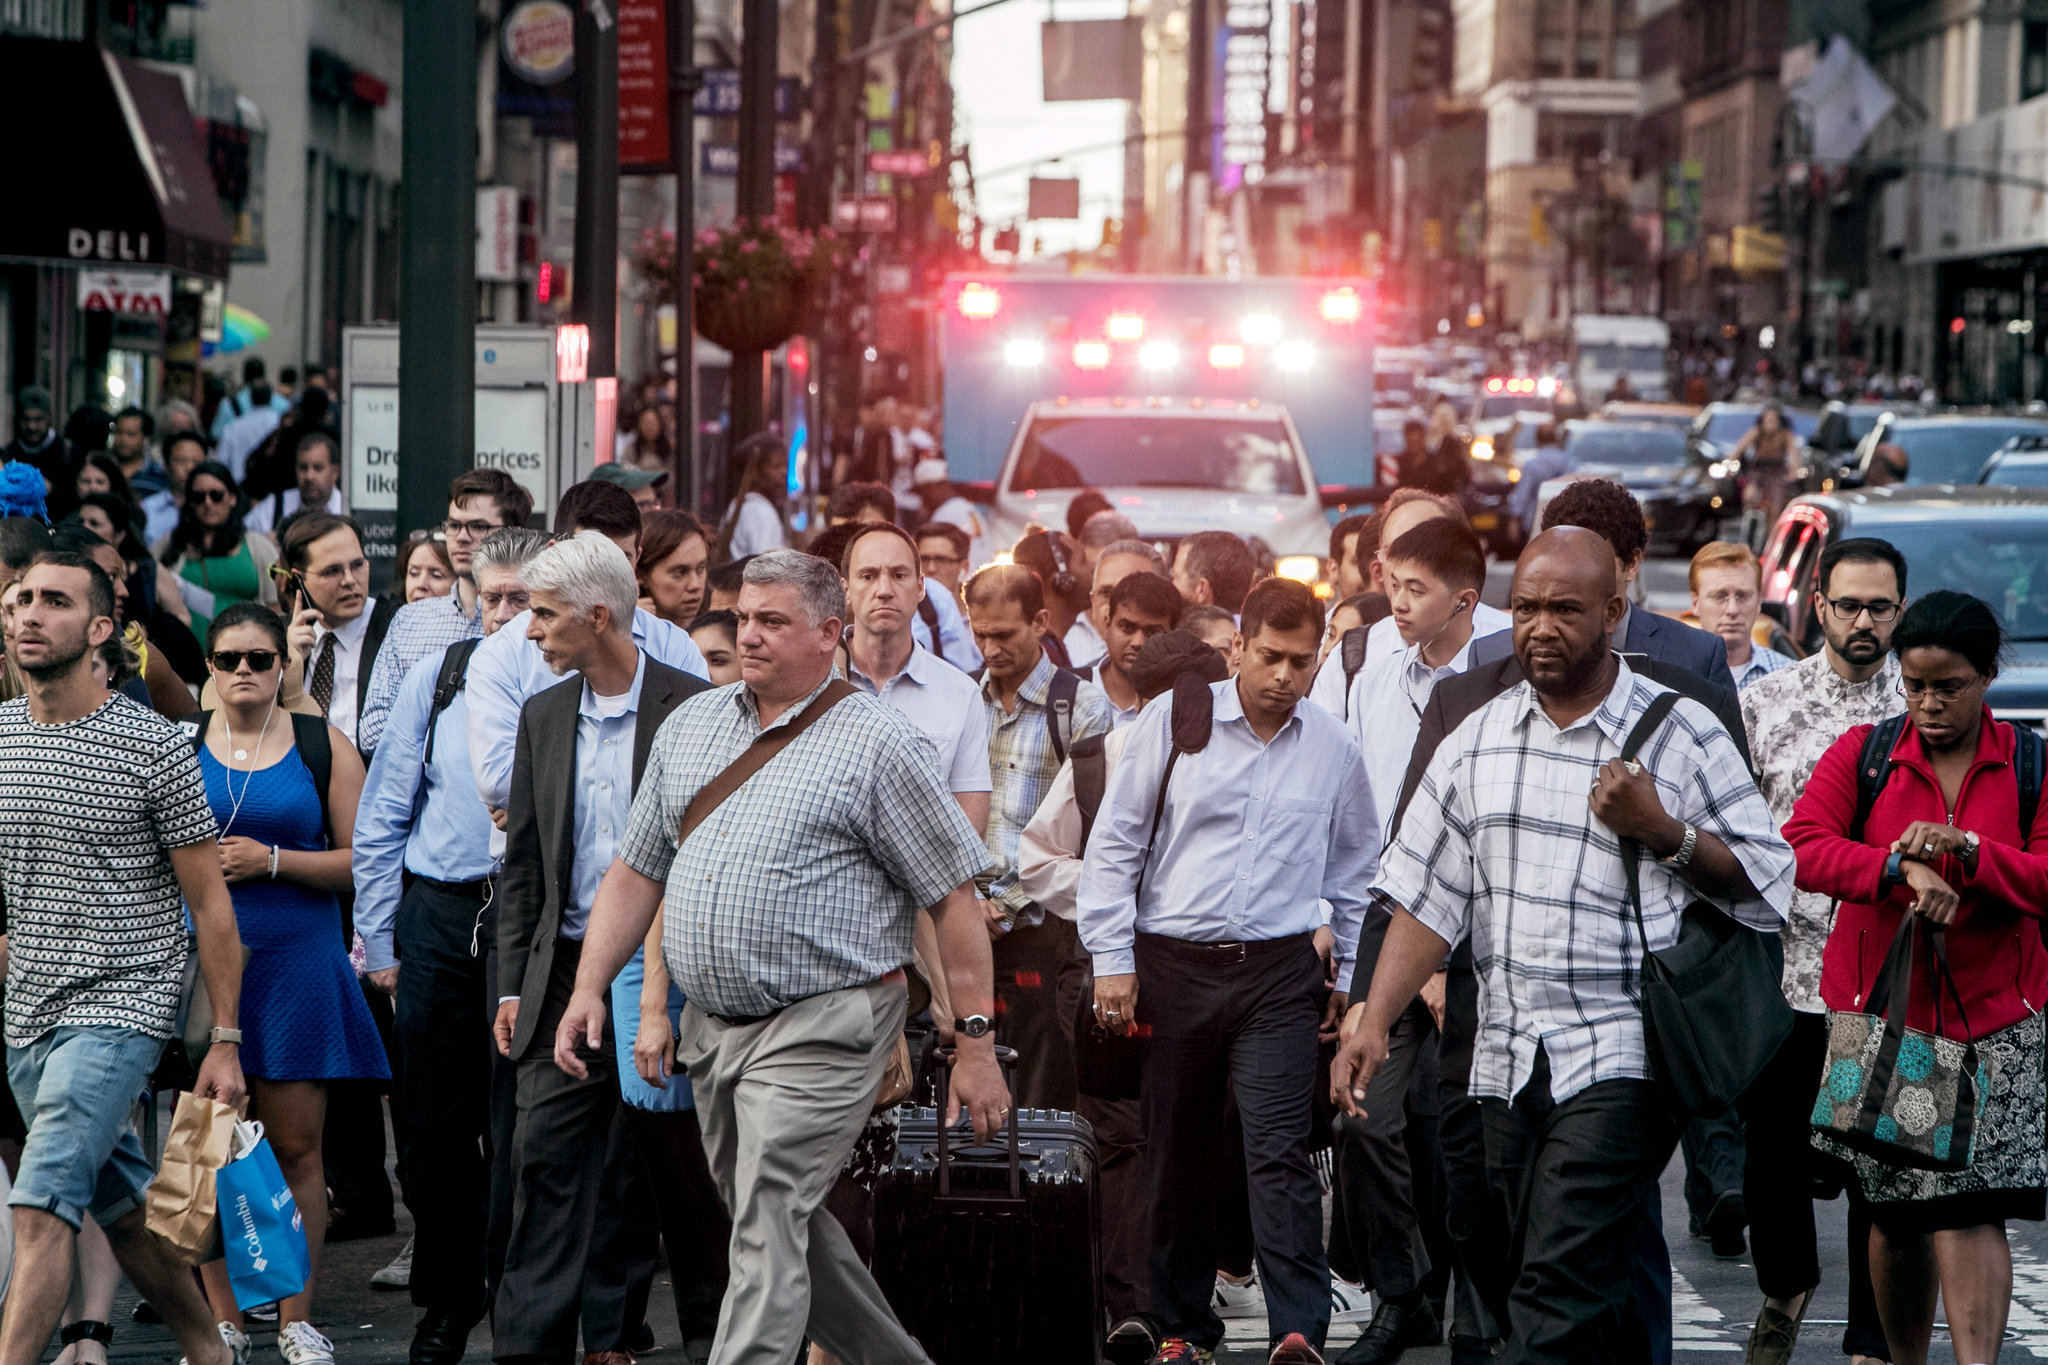

In [7]:
image_path = '/content/drive/MyDrive/Banana Lassi/no_mask3.jpg'

with open(image_path, 'rb') as f:
  np_image_string = np.array([f.read()])
  
image = Image.open(image_path)
width, height = image.size
np_image = np.array(image.getdata()).reshape(height, width, 3).astype(np.uint8)

display.display(display.Image(image_path, width=1024))

In [ ]:
# ini buat mendeteksi objek, sehingga harus di run jika ada gambar baru

def apasih(alamat):
  nama = {0: 'No', 1: 'With'}

  with open(alamat, 'rb') as f:
    np_image_string = np.array([f.read()])
    f.close()

  image = Image.open(alamat)
  width, height = image.size
  np_image = np.array(image.getdata()).reshape(height, width, 3).astype(np.uint8)

  num_detections, detection_boxes, detection_classes, detection_scores, detection_masks, image_info = session.run(
      ['NumDetections:0', 'DetectionBoxes:0', 'DetectionClasses:0', 'DetectionScores:0', 'DetectionMasks:0', 'ImageInfo:0'],
      feed_dict={'Placeholder:0': np_image_string})

  num_detections = np.squeeze(num_detections.astype(np.int32), axis=(0,))
  detection_boxes = np.squeeze(detection_boxes * image_info[0, 2], axis=(0,))[0:num_detections]
  detection_scores = np.squeeze(detection_scores, axis=(0,))[0:num_detections]
  detection_classes = np.squeeze(detection_classes.astype(np.int32), axis=(0,))[0:num_detections]
  instance_masks = np.squeeze(detection_masks, axis=(0,))[0:num_detections]
  ymin, xmin, ymax, xmax = np.split(detection_boxes, 4, axis=-1)
  processed_boxes = np.concatenate([xmin, ymin, xmax - xmin, ymax - ymin], axis=-1)
  segmentations = coco_metric.generate_segmentation_from_masks(instance_masks, processed_boxes, height, width)


  detection_boxes = detection_boxes[detection_classes==1]
  detection_scores = detection_scores[detection_classes==1]
  instance_masks = instance_masks[detection_classes==1]
  segmentations = segmentations[detection_classes==1]
  detection_classes = detection_classes[detection_classes==1]


  detection_boxes = detection_boxes[detection_scores>0.5]
  instance_masks = instance_masks[detection_scores>0.5]
  segmentations = segmentations[detection_scores>0.5]
  detection_classes = detection_classes[detection_scores>0.5]
  detection_scores = detection_scores[detection_scores>0.5]


  #buat ngefilter orang aja

  detection_boxes = detection_boxes[detection_classes==1]
  detection_scores = detection_scores[detection_classes==1]
  instance_masks = instance_masks[detection_classes==1]
  segmentations = segmentations[detection_classes==1]
  detection_classes = detection_classes[detection_classes==1]

  #kepala
  detection_boxes[:,2]=detection_boxes[:,0]+(detection_boxes[:,3]-detection_boxes[:,1])//2

  #ini buat ngerubah kotak yang floating jadi integer
  d = detection_boxes.astype(int)

  #buat memotong orang
  font = cv2.FONT_HERSHEY_SIMPLEX 
  fontScale = 1
  color = (255, 255, 255) 
  thickness = 1

  for kotak in d :
    cv2.rectangle(np_image, (kotak[1], kotak[0]), (kotak[3], kotak[2]), (255,255,255), 1)

    img = np_image[kotak[0]:kotak[2],kotak[1]:kotak[3]]
    img = cv2.resize(img, (128, 128)) 
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    hasil = model.predict_classes(img)

    np_image = cv2.putText(np_image, nama[hasil[0][0]], (kotak[1], kotak[0]), font, fontScale, color, thickness, cv2.LINE_AA) 
  
  np_image = cv2.cvtColor(np_image, cv2.COLOR_BGR2RGB)
  return np_image

In [ ]:
#buat memotong orang
from keras.preprocessing import image

font = cv2.FONT_HERSHEY_SIMPLEX 
fontScale = 1
color = (255, 255, 255) 
thickness = 1

nomor = 0
for kotak in d :
  cv2.rectangle(np_image, (kotak[1], kotak[0]), (kotak[3], kotak[2]), (255,255,255), 1)

  img = np_image[kotak[0]:kotak[2],kotak[1]:kotak[3]]
  img = cv2.resize(img, (128, 128)) 
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  hasil = model.predict_classes(img)

  np_image = cv2.putText(np_image, nama[hasil[0][0]], (kotak[1], kotak[0]), font, fontScale, color, thickness, cv2.LINE_AA) 
  nomor = nomor + 1  
np_image = cv2.cvtColor(np_image, cv2.COLOR_BGR2RGB)
cv2_imshow(np_image)

Using TensorFlow backend.


NameError: ignored